#Instalación y funciones

In [ ]:
!pip install numpy-financial

In [ ]:
import numpy_financial as npf
import math
import pandas as pd  # Importa Pandas para visualizar como tabla
import matplotlib.pyplot as plt  # Para las gráficas

# Parámetros iniciales y configuración de variaciones
precio_p_min = 600
precio_p_max = 1200
step_p = 100

precio_b_min = 240
precio_b_max = 450
step_b = 30

tasa_descuento = 0.05 # 5% de C.O
tasa_descuento2 = 0.08  # 8% de C.O

# Función para calcular el VPN
def calcular_vpn(flujo_inicial, flujos, tasa_descuento):
    vpn_flujos_futuros = 0
    for t in range(1, len(flujos)):
        valor_presente = flujos[t] / (1 + tasa_descuento) ** t
        vpn_flujos_futuros += valor_presente
    vpn_total = flujo_inicial + vpn_flujos_futuros
    return vpn_total

# Función para calcular el Payback Time
def calcular_nper(PV, PMT, rate, FV=0):
    if rate == 0:
        return PV / PMT  # Caso especial sin tasa de interés

    try:
        denominador = PMT + rate * PV
        if denominador <= 0:
            return None  # Evita divisiones inválidas
        NPER = math.log((PMT - rate * FV) / denominador) / math.log(1 + rate)
        return NPER
    except (ValueError, ZeroDivisionError):
        return None  # Manejo de errores matemáticos

# Con BESS Ind1 0.2





In [ ]:
calculo_segv = 41298.25+136372.5726
segunda_variable = calculo_segv*0.2
# Lista para almacenar resultados
resultados = []

# Iterar sobre todas las combinaciones de precio_p y precio_b
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    for precio_b in range(precio_b_min, precio_b_max + 1, step_b):
        primer_variable = -(220 * precio_p + 355 * precio_b)

        # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
        flujos = [primer_variable] + [segunda_variable] * 25

        # Calcular la TIR
        tir = npf.irr(flujos)
        tir_porcentaje = round(tir * 100, 5)

        # Calcular VPN
        flujo_inicial = flujos[0]
        vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
        vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

        # Calcular Payback Time
        payback = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento)
        payback2 = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento2)

        # Guardar resultados en la lista
        resultados.append({
            "Precio_P": precio_p,
            "Precio_B": precio_b,
            "TIR (%)": tir_porcentaje,
            "VPN (5%)": round(vpn_total, 2),
            "Payback (5%)": round(payback, 4),
            "VPN (8%)": round(vpn_total2, 2),
            "Payback (8%)": round(payback2, 4)
        })

#Mostrar los resultados en una tabla con Pandas
df_resultados = pd.DataFrame(resultados)
'''
print("\nResultados en formato de tabla:\n")
print(df_resultados.to_string(index=False))  # Muestra la tabla sin índice'''

# Opcional: Guardar resultados en un archivo CSV
df_resultados.to_csv("resultados_Ind1_BESS02.csv", index=False)
print("\nResultados guardados en 'resultados_Ind1_BESS02.csv'")

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind1_BESS02.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind1_BESS02.xlsx'")


# Crear una lista de valores únicos de precio_p
valores_precio_p = sorted(df_resultados["Precio_P"].unique())

precio_b_2 = 0  # precio_b es constante
segunda_variable_2 = 28819.4751955

# Lista para almacenar resultados
resultados_2 = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable_2 = primer_variable_2 = -(220 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos_2 = [primer_variable_2] + [segunda_variable_2] * 25

    # Calcular la TIR
    tir_2 = npf.irr(flujos_2)
    tir_porcentaje_2 = round(tir_2 * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial_2 = flujos_2[0]
    vpn_total_2 = calcular_vpn(flujo_inicial_2, flujos_2, tasa_descuento)
    vpn_total2_2 = calcular_vpn(flujo_inicial_2, flujos_2, tasa_descuento2)

    # Calcular Payback Time
    payback_2 = calcular_nper(flujo_inicial_2, segunda_variable_2, tasa_descuento)
    payback2_2 = calcular_nper(flujo_inicial_2, segunda_variable_2, tasa_descuento2)


    # Guardar resultados en la lista
    resultados_2.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje_2,
        "VPN (5%)": round(vpn_total_2, 2),
        "Payback (5%)": round(payback_2, 4),
        "VPN (8%)": round(vpn_total2_2, 2),
        "Payback (8%)": round(payback2_2, 4)
    })

# Mostrar los resultados en formato de tabla con Pandas
df_resultados_2 = pd.DataFrame(resultados_2)

# Guardar los resultados en un archivo CSV
output_file_2 = "resultados_vpn_tir_payback_Ind1_sinbat.csv"
df_resultados_2.to_csv(output_file_2, index=False)
'''
print("\nResultados para la industria 1:")
print(df_resultados_2.to_string(index=False))'''

# Crear una lista de valores únicos de precio_b
valores_precio_b = sorted(df_resultados["Precio_B"].unique())



Resultados guardados en 'resultados_vpn_tir_payback.csv'


#Sin BESS Ind1 0.2

In [ ]:

calculo_segv_2 =28819.4751955+36339.4236325001
precio_b_2 = 0  # precio_b es constante
segunda_variable_2 = calculo_segv_2*0.2


# Lista para almacenar resultados
resultados_2 = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable_2 = primer_variable_2 = -(220 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos_2 = [primer_variable_2] + [segunda_variable_2] * 25

    # Calcular la TIR
    tir_2 = npf.irr(flujos_2)
    tir_porcentaje_2 = round(tir_2 * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial_2 = flujos_2[0]
    vpn_total_2 = calcular_vpn(flujo_inicial_2, flujos_2, tasa_descuento)
    vpn_total2_2 = calcular_vpn(flujo_inicial_2, flujos_2, tasa_descuento2)

    # Calcular Payback Time
    payback_2 = calcular_nper(flujo_inicial_2, segunda_variable_2, tasa_descuento)
    payback2_2 = calcular_nper(flujo_inicial_2, segunda_variable_2, tasa_descuento2)

    # Guardar resultados en la lista
    resultados_2.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje_2,
        "VPN (5%)": round(vpn_total_2, 2),
        "Payback (5%)": round(payback_2, 4) if payback_2 is not None else None,
        "VPN (8%)": round(vpn_total2_2, 2),
        "Payback (8%)": round(payback2_2, 4) if payback2_2 is not None else None
    })

# Mostrar los resultados en formato de tabla con Pandas
df_resultados_2 = pd.DataFrame(resultados_2)

# Opcional: Guardar resultados en un archivo CSV
df_resultados_2.to_csv("resultados_Ind1_sinBESS02.csv", index=False)
print("\nResultados guardados en 'resultados_Ind1_sinBESS02.csv'")

# Guardar los resultados en un archivo Excel
df_resultados_2.to_excel("resultados_Ind1_sinBESS02.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind1_sinBESS02.xlsx'")

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados_2["Orden"] = df_resultados_2.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados_2 = df_resultados_2.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados_2 = df_resultados_2.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados_2["CAPEX (Precio_P-B)"] = df_resultados_2["Precio_P"].astype(str) + " - " + df_resultados_2["Precio_B"].astype(str)


# Comparacion Ind1 0.2

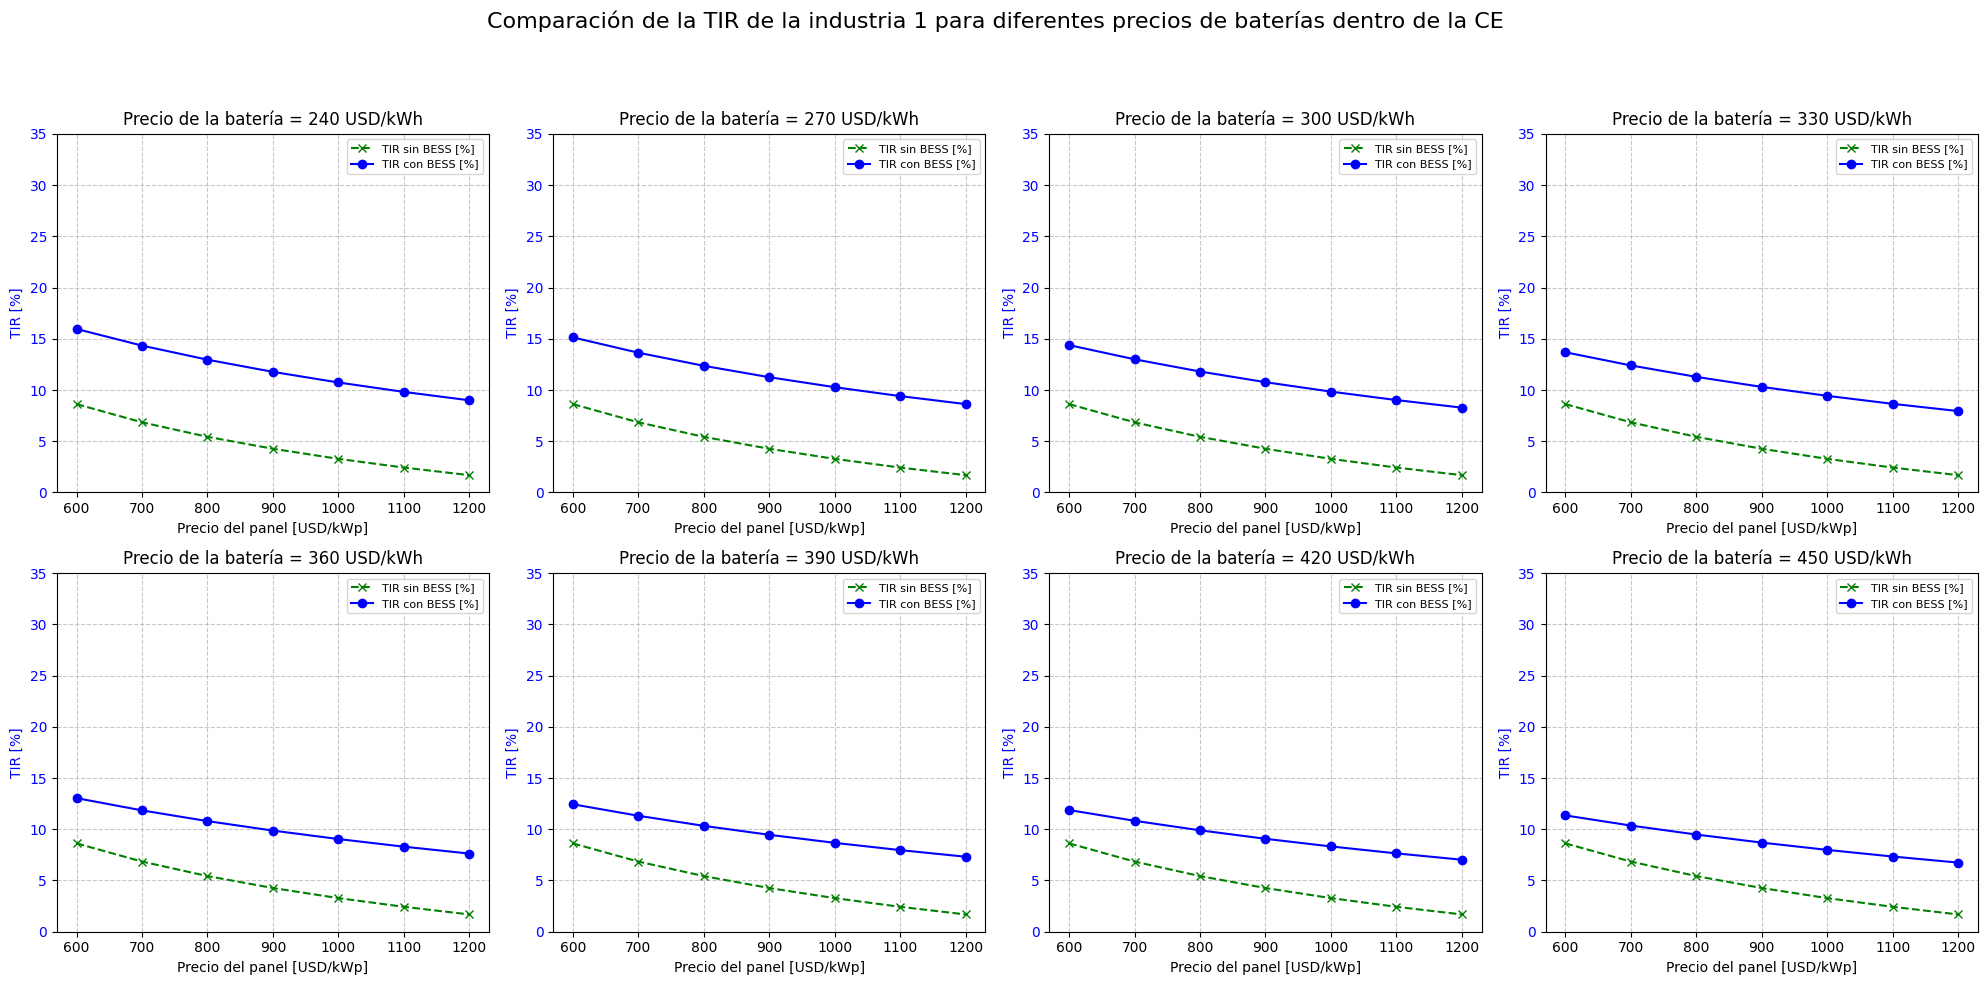

In [ ]:
# Configurar la figura con subplots en dos filas (4 columnas por fila)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_B y su respectivo subplot
for i, precio_b in enumerate(valores_precio_b):
    ax1 = axes[i]

    # Filtrar los datos para el Precio_B actual en ambos dataframes
    data_filtrada = df_resultados[df_resultados["Precio_B"] == precio_b]

    # **Aquí está el cambio:** Usar df_resultados_2 completo para la curva sin BESS
    data_filtrada_2 = df_resultados_2


    # Graficar TIR sin BESS en el eje Y para todos los subgráficos
    ax1.plot(
        data_filtrada_2["Precio_P"],
        data_filtrada_2["TIR (%)"],  # TIR sin BESS
        marker='x', linestyle='--', color='g', label='TIR sin BESS [%]'
    )

    # Graficar TIR con BESS en el mismo gráfico
    ax1.plot(
        data_filtrada["Precio_P"],
        data_filtrada["TIR (%)"],  # TIR con BESS
        marker='o', linestyle='-', color='b', label='TIR con BESS [%]'
    )


    # Título con el precio de la batería
    ax1.set_title(f"Precio de la batería = {precio_b} USD/kWh", fontsize=12)

    # Etiquetas
    ax1.set_xlabel("Precio del panel [USD/kWp]", fontsize=10)
    ax1.set_ylabel("TIR [%]", color='b', fontsize=10)
    ax1.set_ylim(0, 35)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar las leyendas
    ax1.legend(loc="upper right", fontsize=8)
    ax1.tick_params(axis='x', labelbottom=True)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_b), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("Comparación de la TIR de la industria 1 para diferentes precios de baterías dentro de la CE", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()

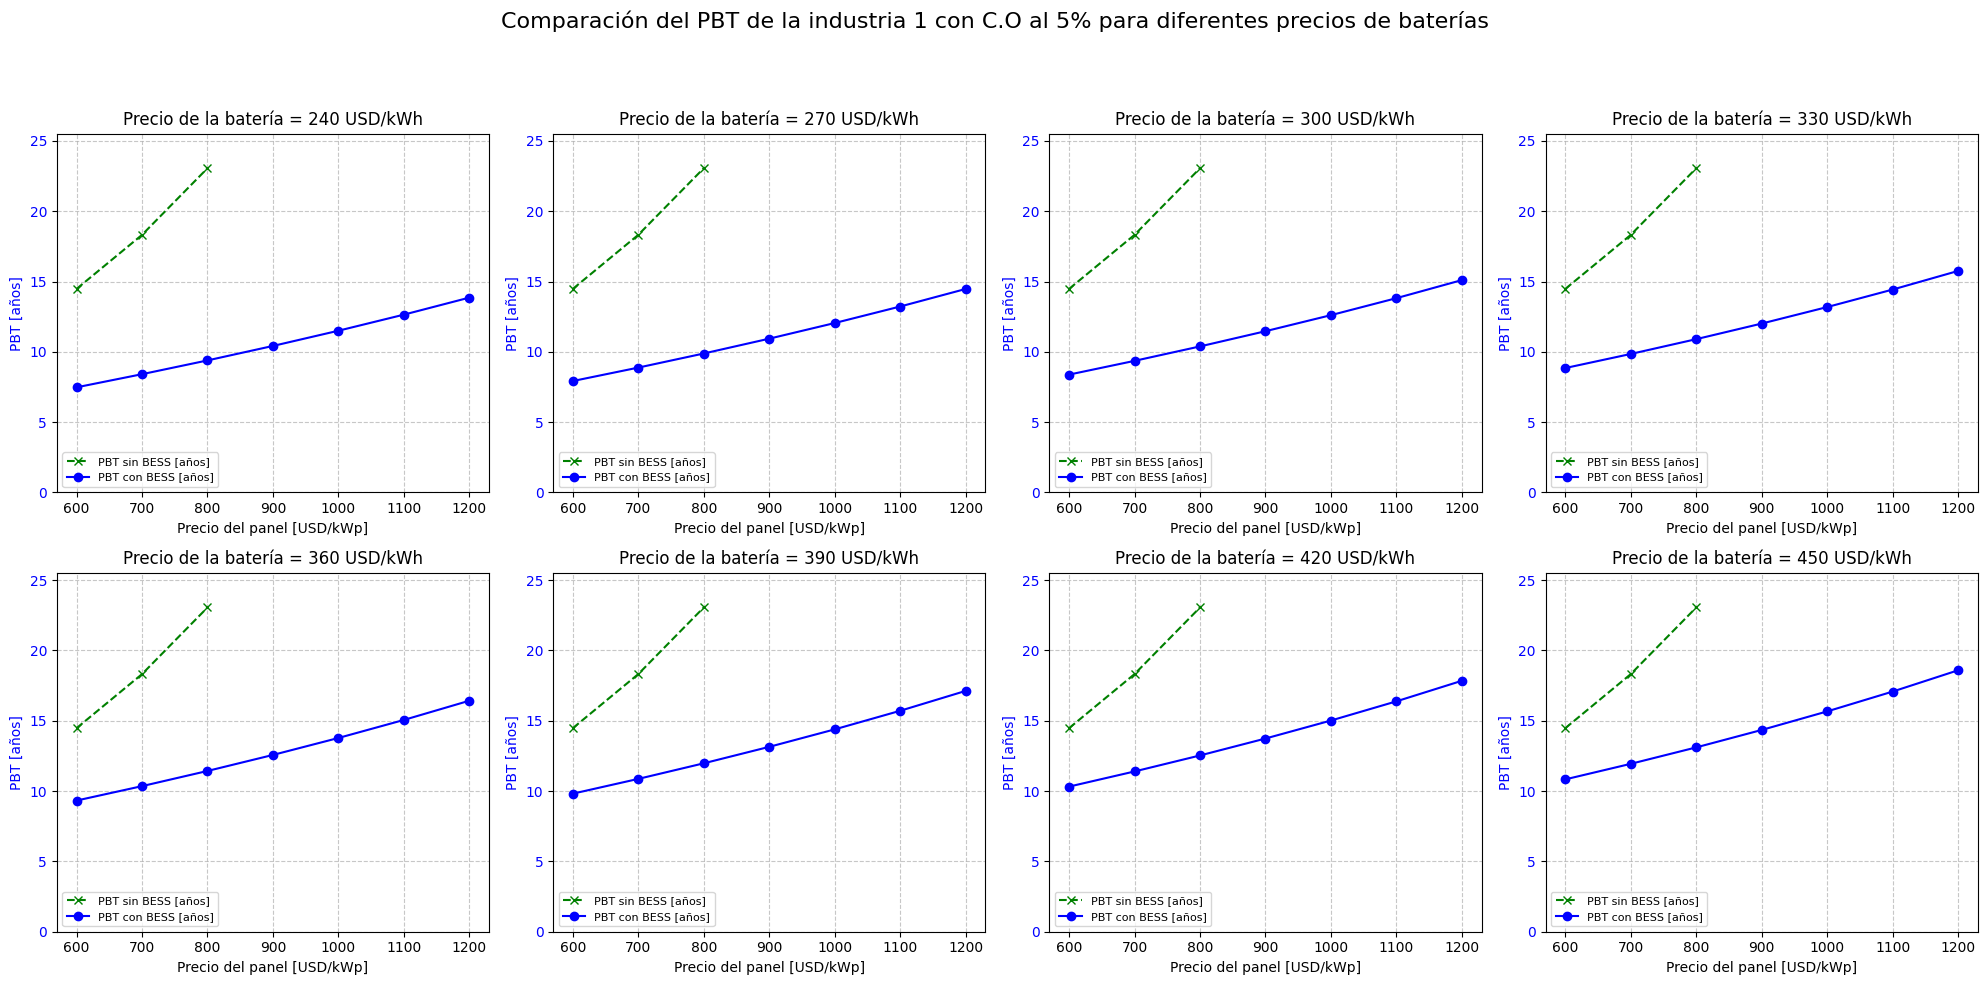

In [ ]:
# Configurar la figura con subplots en dos filas (4 columnas por fila)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_B y su respectivo subplot
for i, precio_b in enumerate(valores_precio_b):
    ax1 = axes[i]

    # Filtrar los datos para el Precio_B actual en ambos dataframes
    data_filtrada = df_resultados[df_resultados["Precio_B"] == precio_b].copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT con BESS
    data_filtrada_grafica = data_filtrada.copy()
    data_filtrada_grafica["Payback (5%)"] = data_filtrada_grafica["Payback (5%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # **Aquí está el cambio:** Usar df_resultados_2 completo para la curva sin BESS
    data_filtrada_2 = df_resultados_2.copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT sin BESS
    data_filtrada_2_grafica = data_filtrada_2.copy()
    data_filtrada_2_grafica["Payback (5%)"] = data_filtrada_2_grafica["Payback (5%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # Graficar PBT sin BESS en el eje Y para todos los subgráficos
    ax1.plot(
        data_filtrada_2_grafica["Precio_P"],
        data_filtrada_2_grafica["Payback (5%)"],  # PBT sin BESS
        marker='x', linestyle='--', color='g', label='PBT sin BESS [años]'
    )

    # Graficar PBT con BESS en el mismo gráfico
    ax1.plot(
        data_filtrada_grafica["Precio_P"],
        data_filtrada_grafica["Payback (5%)"],  # PBT con BESS
        marker='o', linestyle='-', color='b', label='PBT con BESS [años]'
    )

    # Título con el precio de la batería
    ax1.set_title(f"Precio de la batería = {precio_b} USD/kWh", fontsize=12)

    # Etiquetas
    ax1.set_xlabel("Precio del panel [USD/kWp]", fontsize=10)
    ax1.set_ylabel("PBT [años]", color='b', fontsize=10)
    ax1.set_ylim(0, 25.5)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar las leyendas
    ax1.legend(loc="lower left", fontsize=8)
    ax1.tick_params(axis='x', labelbottom=True)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_b), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("Comparación del PBT de la industria 1 con C.O al 5% para diferentes precios de baterías", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()

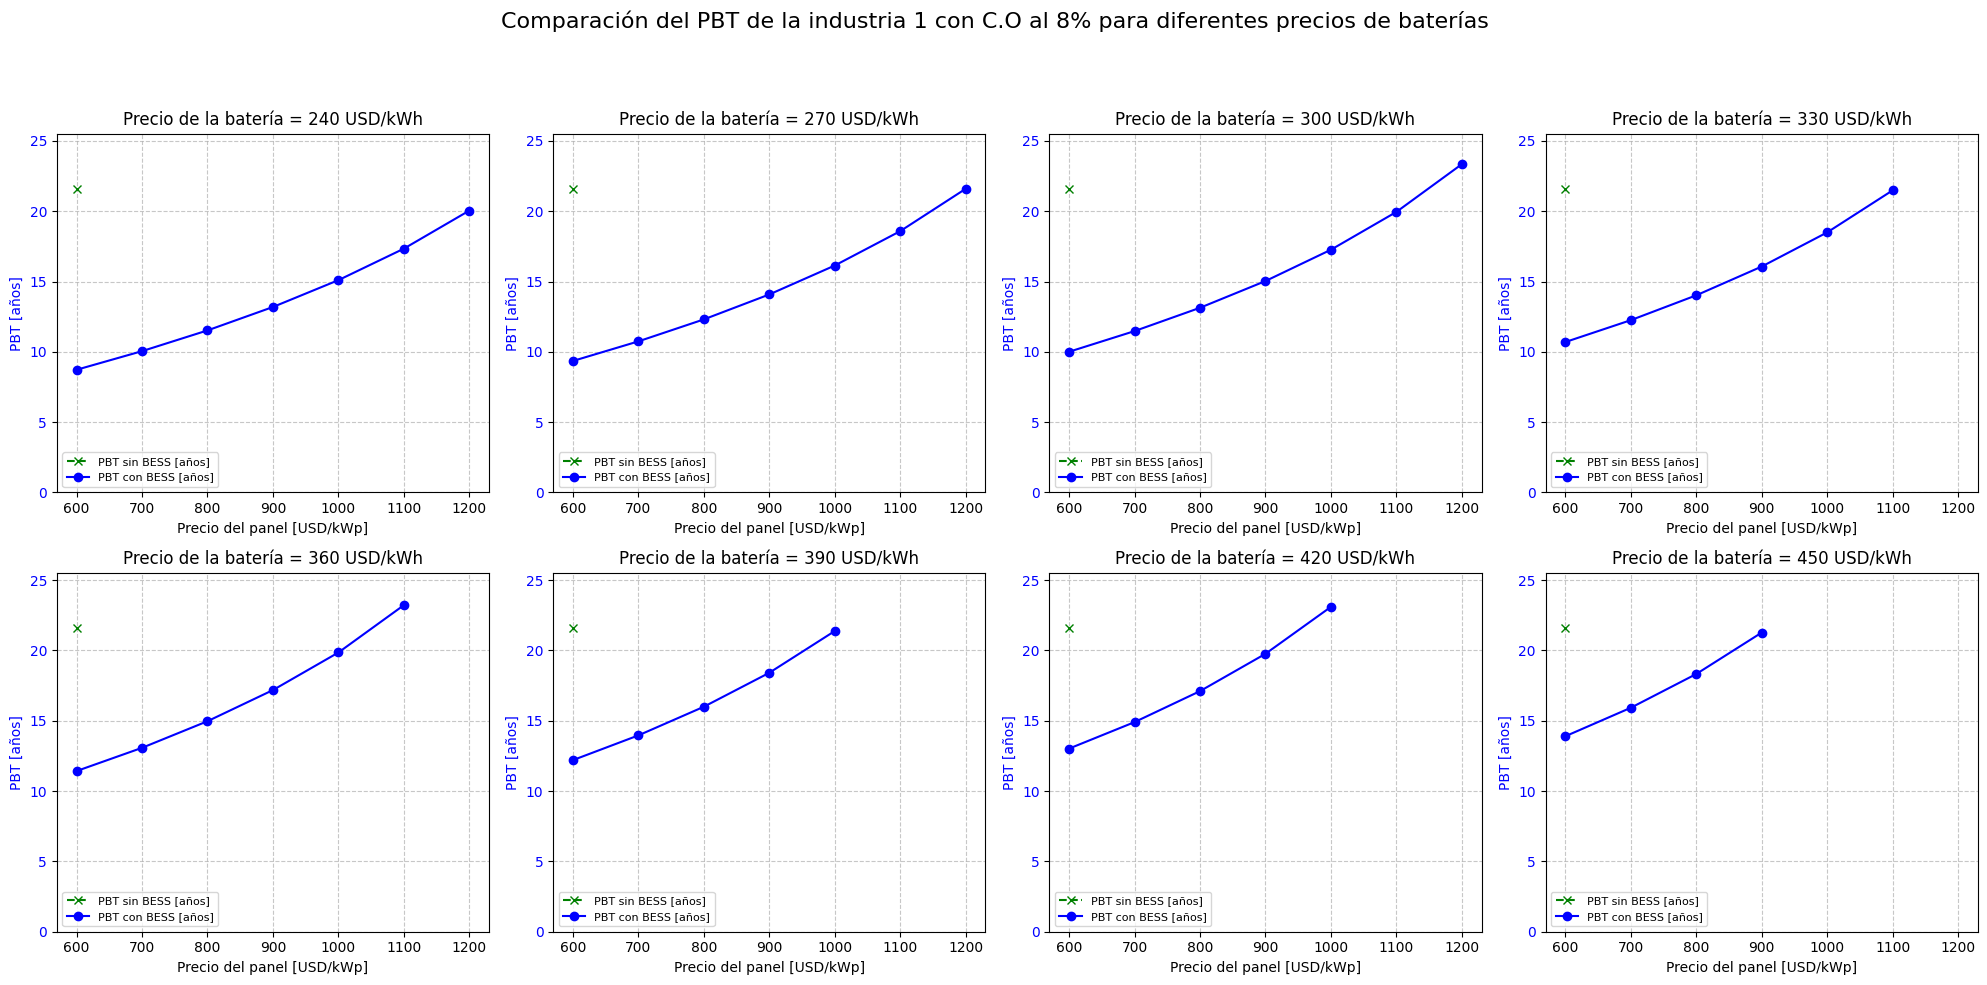

In [ ]:
# Configurar la figura con subplots en dos filas (4 columnas por fila)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_B y su respectivo subplot
for i, precio_b in enumerate(valores_precio_b):
    ax1 = axes[i]

    # Filtrar los datos para el Precio_B actual en ambos dataframes
    data_filtrada = df_resultados[df_resultados["Precio_B"] == precio_b].copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT con BESS
    data_filtrada_grafica = data_filtrada.copy()
    data_filtrada_grafica["Payback (8%)"] = data_filtrada_grafica["Payback (8%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # **Aquí está el cambio:** Usar df_resultados_2 completo para la curva sin BESS
    data_filtrada_2 = df_resultados_2.copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT sin BESS
    data_filtrada_2_grafica = data_filtrada_2.copy()
    data_filtrada_2_grafica["Payback (8%)"] = data_filtrada_2_grafica["Payback (8%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # Graficar PBT sin BESS en el eje Y para todos los subgráficos
    ax1.plot(
        data_filtrada_2_grafica["Precio_P"],
        data_filtrada_2_grafica["Payback (8%)"],  # PBT sin BESS
        marker='x', linestyle='--', color='g', label='PBT sin BESS [años]'
    )

    # Graficar PBT con BESS en el mismo gráfico
    ax1.plot(
        data_filtrada_grafica["Precio_P"],
        data_filtrada_grafica["Payback (8%)"],  # PBT con BESS
        marker='o', linestyle='-', color='b', label='PBT con BESS [años]'
    )

    # Título con el precio de la batería
    ax1.set_title(f"Precio de la batería = {precio_b} USD/kWh", fontsize=12)

    # Etiquetas
    ax1.set_xlabel("Precio del panel [USD/kWp]", fontsize=10)
    ax1.set_ylabel("PBT [años]", color='b', fontsize=10)
    ax1.set_ylim(0, 25.5)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar las leyendas
    ax1.legend(loc="lower left", fontsize=8)
    ax1.tick_params(axis='x', labelbottom=True)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_b), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("Comparación del PBT de la industria 1 con C.O al 8% para diferentes precios de baterías", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()

#Con BESS Ind2 0.8

In [ ]:
segunda_variable_3 = calculo_segv*0.8

# Lista para almacenar resultados
resultados_3 = []

# Iterar sobre todas las combinaciones de precio_p y precio_b
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    for precio_b in range(precio_b_min, precio_b_max + 1, step_b):
        primer_variable_3 = -(525 * precio_p + 3030 * precio_b)

        # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
        flujos_3 = [primer_variable_3] + [segunda_variable_3] * 25

        # Calcular la TIR
        tir_3 = npf.irr(flujos_3)
        tir_porcentaje_3 = round(tir_3 * 100, 5)

        # Calcular VPN
        flujo_inicial_3 = flujos_3[0]
        vpn_total_3 = calcular_vpn(flujo_inicial_3, flujos_3, tasa_descuento)
        vpn_total2_3 = calcular_vpn(flujo_inicial_3, flujos_3, tasa_descuento2)

        # Calcular Payback Time
        payback_3 = calcular_nper(flujo_inicial_3, segunda_variable_3, tasa_descuento)
        payback2_3 = calcular_nper(flujo_inicial_3, segunda_variable_3, tasa_descuento2)

        # Guardar resultados en la lista
        resultados_3.append({
            "Precio_P": precio_p,
            "Precio_B": precio_b,
            "TIR (%)": tir_porcentaje_3,
            "VPN (5%)": round(vpn_total_3, 2),
            "Payback (5%)": round(payback_3, 4)if payback_3 is not None else None,
            "VPN (8%)": round(vpn_total2_3, 2),
            "Payback (8%)": round(payback2_3, 4) if payback2_3 is not None else None
        })

# Mostrar los resultados en una tabla con Pandas
df_resultados_3 = pd.DataFrame(resultados_3)

# Opcional: Guardar resultados en un archivo CSV
df_resultados_3.to_csv("resultados_Ind2_BESS08.csv", index=False)
print("\nResultados guardados en 'resultados_Ind2_BESS08.csv'")

# Guardar los resultados en un archivo Excel
df_resultados_3.to_excel("resultados_Ind2_BESS08.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind2_BESS08.xlsx'")

#Sin BESS Ind2 0.8

In [ ]:
precio_b_2 = 0  # precio_b es constante
segunda_variable_4 = calculo_segv_2*0.8


# Lista para almacenar resultados
resultados_4 = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable_4 = primer_variable_4 = -(525 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos_4 = [primer_variable_4] + [segunda_variable_4] * 25

    # Calcular la TIR
    tir_4 = npf.irr(flujos_4)
    tir_porcentaje_4 = round(tir_4 * 100, 5)

    # Calcular VPN para 5% y 8%
    flujo_inicial_4 = flujos_4[0]
    vpn_total_4 = calcular_vpn(flujo_inicial_4, flujos_4, tasa_descuento)
    vpn_total2_4 = calcular_vpn(flujo_inicial_4, flujos_4, tasa_descuento2)

    # Calcular Payback Time
    payback_4 = calcular_nper(flujo_inicial_4, segunda_variable_4, tasa_descuento)
    payback2_4 = calcular_nper(flujo_inicial_4, segunda_variable_4, tasa_descuento2)

    # Guardar resultados en la lista
    resultados_4.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje_4,
        "VPN (5%)": round(vpn_total_4, 2),
        "Payback (5%)": round(payback_4, 4) if payback_4 is not None else None,
        "VPN (8%)": round(vpn_total2_4, 2),
        "Payback (8%)": round(payback2_4, 4) if payback2_4 is not None else None
    })

# Mostrar los resultados en formato de tabla con Pandas
df_resultados_4 = pd.DataFrame(resultados_4)

# Opcional: Guardar resultados en un archivo CSV
df_resultados_4.to_csv("resultados_Ind2_sinBESS08.csv", index=False)
print("\nResultados guardados en 'resultados_Ind2_sinBESS08.csv'")

# Guardar los resultados en un archivo Excel
df_resultados_4.to_excel("resultados_Ind2_sinBESS08.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind2_sinBESS08.xlsx'")

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados_4["Orden"] = df_resultados_4.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados_4 = df_resultados_4.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados_4 = df_resultados_4.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados_4["CAPEX (Precio_P-B)"] = df_resultados_4["Precio_P"].astype(str) + " - " + df_resultados_4["Precio_B"].astype(str)

#Comparacion IND2 0.8

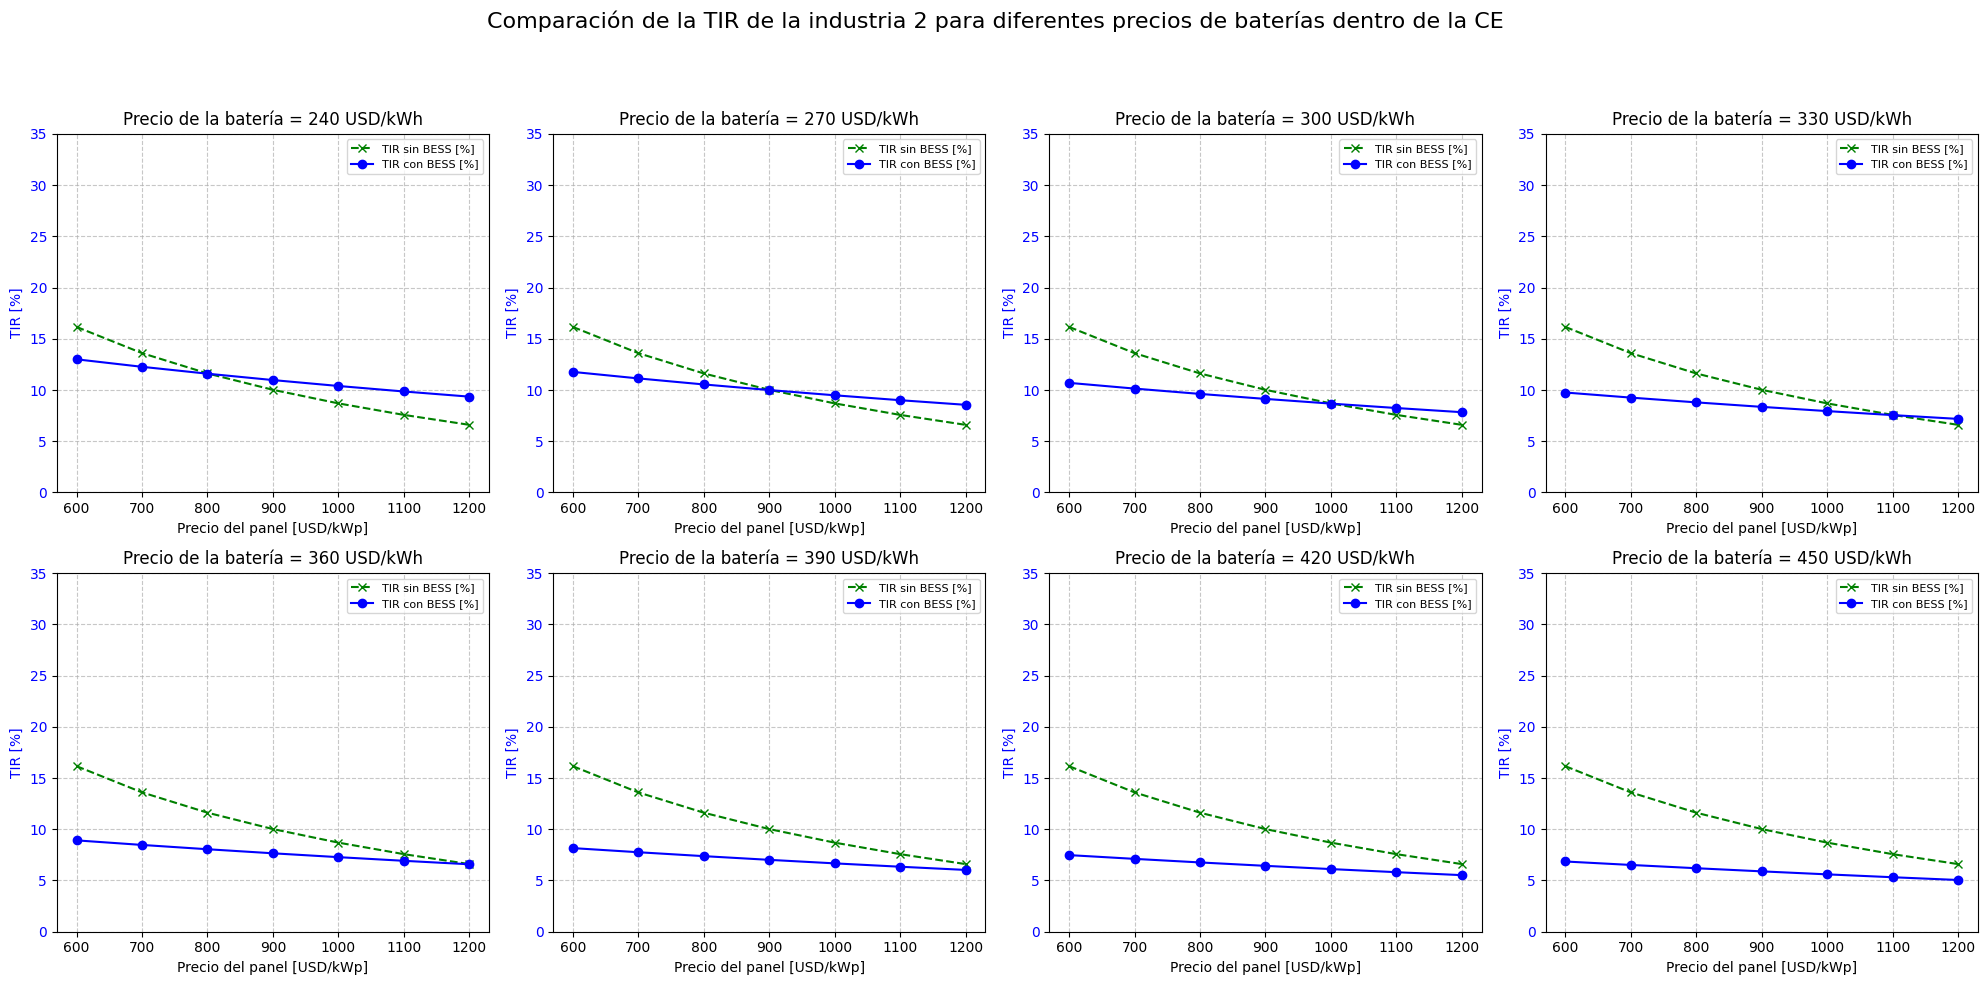

In [ ]:
# Crear una lista de valores únicos de precio_b
valores_precio_b_2 = sorted(df_resultados_3["Precio_B"].unique())

# Configurar la figura con subplots en dos filas (4 columnas por fila)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_B y su respectivo subplot
for i, precio_b in enumerate(valores_precio_b):
    ax1 = axes[i]

    # Filtrar los datos para el Precio_B actual en ambos dataframes
    data_filtrada_3 = df_resultados_3[df_resultados_3["Precio_B"] == precio_b]

    # **Aquí está el cambio:** Usar df_resultados_2 completo para la curva sin BESS
    data_filtrada_4 = df_resultados_4


    # Graficar TIR sin BESS en el eje Y para todos los subgráficos
    ax1.plot(
        data_filtrada_4["Precio_P"],
        data_filtrada_4["TIR (%)"],  # TIR sin BESS
        marker='x', linestyle='--', color='g', label='TIR sin BESS [%]'
    )

    # Graficar TIR con BESS en el mismo gráfico
    ax1.plot(
        data_filtrada_3["Precio_P"],
        data_filtrada_3["TIR (%)"],  # TIR con BESS
        marker='o', linestyle='-', color='b', label='TIR con BESS [%]'
    )


    # Título con el precio de la batería
    ax1.set_title(f"Precio de la batería = {precio_b} USD/kWh", fontsize=12)

    # Etiquetas
    ax1.set_xlabel("Precio del panel [USD/kWp]", fontsize=10)
    ax1.set_ylabel("TIR [%]", color='b', fontsize=10)
    ax1.set_ylim(0, 35)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar las leyendas
    ax1.legend(loc="upper right", fontsize=8)
    ax1.tick_params(axis='x', labelbottom=True)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_b), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("Comparación de la TIR de la industria 2 para diferentes precios de baterías dentro de la CE", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()

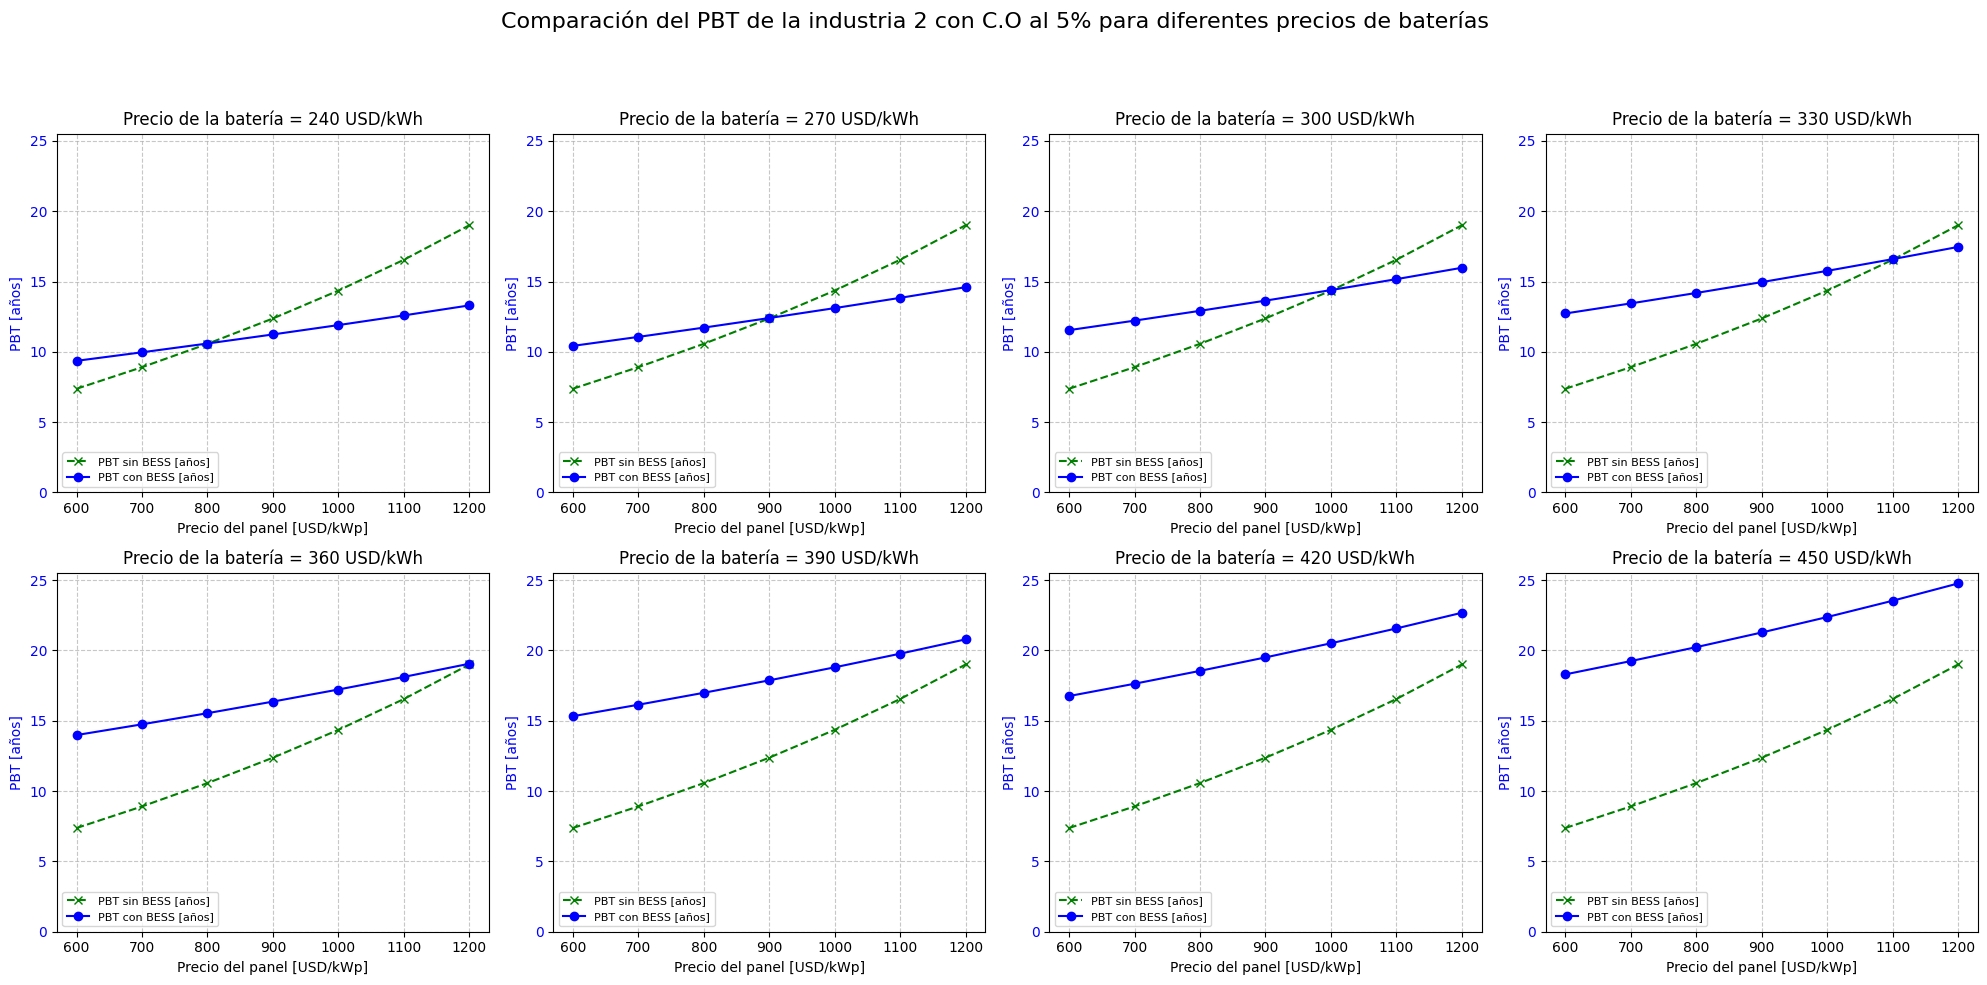

In [ ]:
# Configurar la figura con subplots en dos filas (4 columnas por fila)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_B y su respectivo subplot
for i, precio_b in enumerate(valores_precio_b):
    ax1 = axes[i]

    # Filtrar los datos para el Precio_B actual en ambos dataframes
    data_filtrada_3 = df_resultados_3[df_resultados_3["Precio_B"] == precio_b].copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT con BESS
    data_filtrada_3_grafica = data_filtrada_3.copy()
    data_filtrada_3_grafica["Payback (5%)"] = data_filtrada_3_grafica["Payback (5%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # **Aquí está el cambio:** Usar df_resultados_2 completo para la curva sin BESS
    data_filtrada_4 = df_resultados_4.copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT sin BESS
    data_filtrada_4_grafica = data_filtrada_4.copy()
    data_filtrada_4_grafica["Payback (5%)"] = data_filtrada_4_grafica["Payback (5%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # Graficar PBT sin BESS en el eje Y para todos los subgráficos
    ax1.plot(
        data_filtrada_4_grafica["Precio_P"],
        data_filtrada_4_grafica["Payback (5%)"],  # PBT sin BESS
        marker='x', linestyle='--', color='g', label='PBT sin BESS [años]'
    )

    # Graficar PBT con BESS en el mismo gráfico
    ax1.plot(
        data_filtrada_3_grafica["Precio_P"],
        data_filtrada_3_grafica["Payback (5%)"],  # PBT con BESS
        marker='o', linestyle='-', color='b', label='PBT con BESS [años]'
    )

    # Título con el precio de la batería
    ax1.set_title(f"Precio de la batería = {precio_b} USD/kWh", fontsize=12)

    # Etiquetas
    ax1.set_xlabel("Precio del panel [USD/kWp]", fontsize=10)
    ax1.set_ylabel("PBT [años]", color='b', fontsize=10)
    ax1.set_ylim(0, 25.5)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar las leyendas
    ax1.legend(loc="lower left", fontsize=8)
    ax1.tick_params(axis='x', labelbottom=True)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_b), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("Comparación del PBT de la industria 2 con C.O al 5% para diferentes precios de baterías", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()

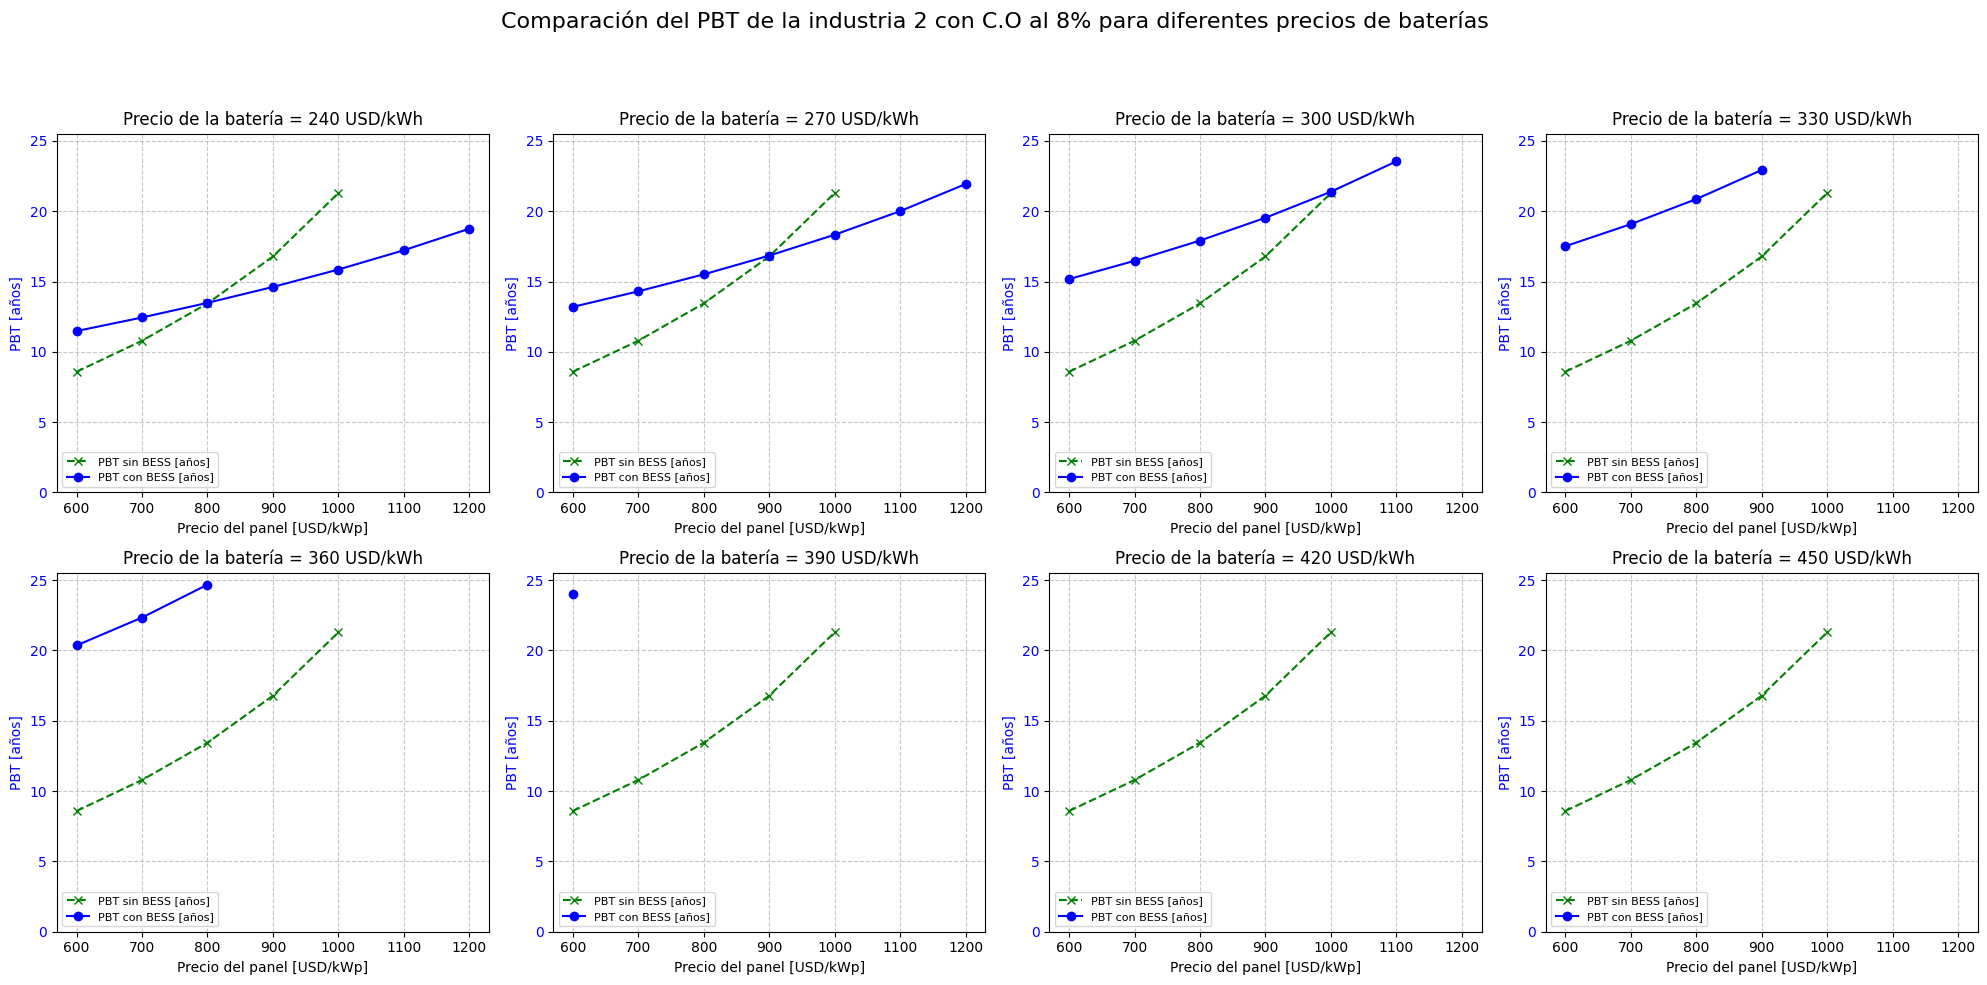

In [ ]:
# Configurar la figura con subplots en dos filas (4 columnas por fila)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True)

# Aplanar los ejes para iterar fácilmente (el último subplot estará vacío si hay menos de 8 gráficos)
axes = axes.flatten()

# Iterar sobre cada valor de Precio_B y su respectivo subplot
for i, precio_b in enumerate(valores_precio_b):
    ax1 = axes[i]

    # Filtrar los datos para el Precio_B actual en ambos dataframes
    data_filtrada_3 = df_resultados_3[df_resultados_3["Precio_B"] == precio_b].copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT con BESS
    data_filtrada_3_grafica = data_filtrada_3.copy()
    data_filtrada_3_grafica["Payback (8%)"] = data_filtrada_3_grafica["Payback (8%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # **Aquí está el cambio:** Usar df_resultados_2 completo para la curva sin BESS
    data_filtrada_4 = df_resultados_4.copy()

    # Crear una copia filtrada con la restricción de Payback <= 25 para PBT sin BESS
    data_filtrada_4_grafica = data_filtrada_4.copy()
    data_filtrada_4_grafica["Payback (8%)"] = data_filtrada_4_grafica["Payback (8%)"].apply(
        lambda x: x if x is not None and x <= 25 else None
    )

    # Graficar PBT sin BESS en el eje Y para todos los subgráficos
    ax1.plot(
        data_filtrada_4_grafica["Precio_P"],
        data_filtrada_4_grafica["Payback (8%)"],  # PBT sin BESS
        marker='x', linestyle='--', color='g', label='PBT sin BESS [años]'
    )

    # Graficar PBT con BESS en el mismo gráfico
    ax1.plot(
        data_filtrada_3_grafica["Precio_P"],
        data_filtrada_3_grafica["Payback (8%)"],  # PBT con BESS
        marker='o', linestyle='-', color='b', label='PBT con BESS [años]'
    )

    # Título con el precio de la batería
    ax1.set_title(f"Precio de la batería = {precio_b} USD/kWh", fontsize=12)

    # Etiquetas
    ax1.set_xlabel("Precio del panel [USD/kWp]", fontsize=10)
    ax1.set_ylabel("PBT [años]", color='b', fontsize=10)
    ax1.set_ylim(0, 25.5)
    ax1.set_xlim(570,1230)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar las leyendas
    ax1.legend(loc="lower left", fontsize=8)
    ax1.tick_params(axis='x', labelbottom=True)

# Eliminar cualquier subplot vacío
for j in range(len(valores_precio_b), len(axes)):
    fig.delaxes(axes[j])

# Configurar el título general de la figura
fig.suptitle("Comparación del PBT de la industria 2 con C.O al 8% para diferentes precios de baterías", fontsize=16)

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Reservar espacio para el título general

# Mostrar la gráfica
plt.show()